<h1 align="center">Simple Linear Regression</h1>

![Image of City of Toronto](http://propertiesunlimited.ca/_media/Images/toronto-banner-1.jpg)

# Table of Contents.
<list>
    <ul><a href=#1>1. Preparation</a></ul>
    <ul><a href=#2>2. Exploring and Cleaning</a></ul>
    <ul><a href=#3>3. Linear Regression</a></ul>
</list>

The dataset is obtained from <a href="https://www.toronto.ca/city-government/data-research-maps/toronto-progress-portal/">Toronto Progress Portal</a>.

<a id=1></a>

# <font color=Red>1. Preparation</font>

## <font color=Blue>1.1. Importing Modules</font>

In [14]:
import numpy as np
import pandas as pd

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [256]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression




<a id=2></a>

# <font color=Red>2. Exploring and Cleaning</font>

## <font color=Blue>2.1. Loading</font>

I will be loading the csv data with Pandas

In [17]:
df=pd.read_csv("TorontoMeasureData.csv")

## <font color=Blue>2.2. Exploring</font>

In [18]:
print("Previewing the first 5 and last 5 rows of the data by concatenating the head and the tail.")
pd.concat([df.head(), df.tail()])

Previewing the first 5 and last 5 rows of the data by concatenating the head and the tail.


,Measure Name,Year,Period,Value
0,Number of Personal Bankruptcies (Ontario),2007,Jan,2307.0
1,Number of Personal Bankruptcies (Ontario),2007,Feb,2369.0
2,Number of Personal Bankruptcies (Ontario),2007,Mar,2715.0
3,Number of Personal Bankruptcies (Ontario),2007,Apr,2651.0
4,Number of Personal Bankruptcies (Ontario),2007,May,2931.0
6296,Libraries Circulation of Materials,2016,Q3,8120345.0
6297,Libraries Circulation of Materials,2016,Q4,7588610.0
6298,Libraries Circulation of Materials,2017,Q1,7531041.0
6299,Libraries Circulation of Materials,2017,Q2,7420675.0
6300,Libraries Circulation of Materials,2017,Q3,7858823.0


Let us look at the individual columns.

In [19]:
for column in df.columns:
    print(column+":", len(df[column].unique()), "unique values")

Measure Name: 69 unique values
Year: 16 unique values
Period: 22 unique values
Value: 5247 unique values


In [20]:
print("The Year column has {} unique values which ranges from {} to {}".format(len(df["Year"].unique()), 
                                                                        df["Year"].unique().min(), 
                                                                        df["Year"].unique().max()))

The Year column has 16 unique values which ranges from 2003 to 2018


In [21]:
print(df["Period"].unique())

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec'
 'Q1' 'Q2' 'Q3' 'Q4' 'Q12' nan 'Winter' 'Spring' 'Summer' 'Fall']


The period column values vary from the months of January to December, the 4 quarters, as well as the 4 seasons.

## <font color=Blue>2.3. Pivoting</font>

We will be pivoting the data based on the time period. Let us explore the total counts.

In [22]:
df["Period"].value_counts()

Feb       455
Jan       455
Mar       455
Apr       455
May       455
Jun       449
Jul       444
Sep       438
Aug       438
Oct       416
Nov       413
Dec       411
Q1        188
Q2        187
Q3        184
Q4        170
Winter     66
Summer     66
Spring     66
Fall       60
Q12         2
Name: Period, dtype: int64

I will filter the data based on the months. It is possible to aggregate Jan, Feb and Apr into Q1 but the volume of 188 Q1 data points is miniscule compared the sheer 455 counts of January itself.

In [139]:
# Filtering by the 12 months from Jan to Dec
df["Time"] = df["Year"].apply(str) + " " + df["Period"]
df1=df[df["Period"].isin(df["Period"].value_counts()[:12].index)].pivot(index="Time", columns="Measure Name", values="Value")
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 2007 Apr to 2017 Sep
Data columns (total 44 columns):
Average Home Price (City of Toronto)                                                               102 non-null float64
Average Weekly Hours Worked (Toronto Residents)                                                    127 non-null float64
CPI - Consumer Price Index - Toronto (% Change)                                                    114 non-null float64
Child Care Number of Children on Wait list for a Child Care Fee Subsidy                            130 non-null float64
Child Care Number of Licensed Child Care Spaces                                                    58 non-null float64
Construction Value of Building Applications Received (All Types)                                   129 non-null float64
Construction Value of Building Applications Received (Residential)                                 130 non-null float64
Construction Value of Building Applications Recei

In [140]:
# Forward filling and then back filling missing values
df1=df1.fillna(method="ffill").fillna(method="bfill")

In [254]:
# Viewing the data
pd.concat([df1.head(), df1.tail()])

Measure Name,Average Home Price (City of Toronto),Average Weekly Hours Worked (Toronto Residents),CPI - Consumer Price Index - Toronto (% Change),Child Care Number of Children on Wait list for a Child Care Fee Subsidy,Child Care Number of Licensed Child Care Spaces,Construction Value of Building Applications Received (All Types),Construction Value of Building Applications Received (Residential),Construction Value of Building Applications Received- Industrial Commercial & Institutional,Construction Value of Building Permits Issued (All Types),Construction Value of Building Permits Issued (Industrial Commercial & Institutional),...,Percentage of Ontario Residential Mortgages (in Arrears 3 months or more),Percentage who are Self-Employed (Toronto Residents),Retail Sales - Toronto CMA (CAD),Revenue from Land Transfer Tax,Revenue from Sale of Recycled Materials,TTC Average Weekday Ridership,TTC Monthly Ridership,TTC Ridership Revenues,Unemployment Rate (Toronto Residents),Water Revenues Billed for all Water Customers
Time,,,,,,,,,,,,,,,,,,,,,
2007 Apr,421470.0,36.44,0.012635,9435.0,55207.0,3.888000e+08,1.864000e+08,202400000.0,334300000.0,177400000.0,...,0.0030,0.1607,4680806.0,9000000.0,2308000.0,1491000.0,33965000.0,60300000.0,0.079313,3.890597e+07
2007 Aug,421470.0,37.07,0.012635,12905.0,55207.0,4.792000e+08,1.981000e+08,281100000.0,334100000.0,202100000.0,...,0.0030,0.1594,5005334.0,9000000.0,2049000.0,1356000.0,33965000.0,55400000.0,0.077169,6.257316e+07
2007 Dec,421470.0,36.56,0.012635,12036.0,55207.0,9.277000e+08,4.065000e+08,521200000.0,399400000.0,174500000.0,...,0.0030,0.1573,6049660.0,9000000.0,1854000.0,1396000.0,33965000.0,62200000.0,0.077847,4.244041e+07
2007 Feb,421470.0,36.08,0.012635,8398.0,55207.0,2.677000e+08,1.085000e+08,159200000.0,267600000.0,159200000.0,...,0.0030,0.1556,3776196.0,9000000.0,2052000.0,1486000.0,33965000.0,60600000.0,0.079962,4.354290e+07
2007 Jan,421470.0,36.16,0.012635,8503.0,55207.0,2.069000e+08,8.050000e+07,126400000.0,249400000.0,138300000.0,...,0.0029,0.1506,3926790.0,9000000.0,1757000.0,1400000.0,33965000.0,70600000.0,0.075162,4.000532e+07
2017 Mar,899452.0,36.27,0.020721,15517.0,69377.0,1.249757e+09,4.656831e+08,784073437.0,772018656.0,371974212.0,...,0.0012,0.1757,7195604.0,59270710.0,2731621.0,1685000.0,51768000.0,112700000.0,0.077808,9.109488e+07
2017 May,899728.0,36.36,0.019055,14385.0,68762.0,2.175749e+09,4.089610e+08,385663851.0,936870801.0,399894706.0,...,0.0011,0.1831,8083862.0,79609764.0,2404960.0,1686000.0,40598000.0,87500000.0,0.074695,9.272812e+07
2017 Nov,899728.0,36.36,0.019055,14385.0,68762.0,2.175749e+09,4.089610e+08,385663851.0,936870801.0,399894706.0,...,0.0011,0.1831,8083862.0,79609764.0,2404960.0,1686000.0,40598000.0,87500000.0,0.074695,9.272812e+07
2017 Oct,899728.0,36.36,0.019055,12508.0,73065.0,2.175749e+09,6.059982e+08,385663851.0,936870801.0,399894706.0,...,0.0011,0.1831,8083862.0,79609764.0,2404960.0,1686000.0,40598000.0,87500000.0,0.074695,9.272812e+07


<a id=3></a>

# <font color=Red>3. Linear Regression</font>

I am trying to see what factors drive the average home price in Toronto

## <font color=Blue>3.1. Using 5 Features</font>

In [235]:
# Separating labels and features
y=df1["Average Home Price (City of Toronto)"]
X=df1[["Construction Value of Building Applications Received (All Types)", 
      "Construction Value of Building Permits Issued (All Types)", 
      "Interest on Outstanding Property Tax Accounts", 
      "Number of Home Sales (City of Toronto)", 
      "Revenue from Land Transfer Tax"]]

In [236]:
# Allocating train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [237]:
# Instantiating the model
lm=LinearRegression(normalize=True)

# Fitting train data into model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [238]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients.sort_values("Coefficient", axis=0, ascending=False)[:10]

,Coefficient
Measure Name,
Number of Home Sales (City of Toronto),12.686291
Revenue from Land Transfer Tax,0.005645
Construction Value of Building Applications Received (All Types),0.000025
Construction Value of Building Permits Issued (All Types),-0.000023
Interest on Outstanding Property Tax Accounts,-0.042305


In [239]:
predictions=lm.predict(X_test)

Text(0,0.5,'Predicted Y')

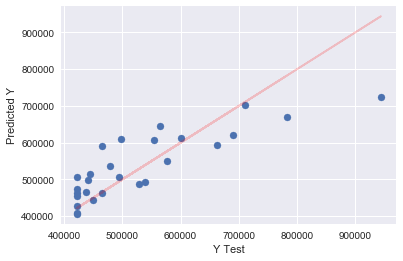

In [241]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test, "-r", alpha=.2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [240]:
print("R square: {}".format(r2_score(y_test, predictions)))
print("RMSE square: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))


R square: 0.6884735008492819
RMSE square: 71703.14886157514


Weak R squared score and quite the large RMSE.

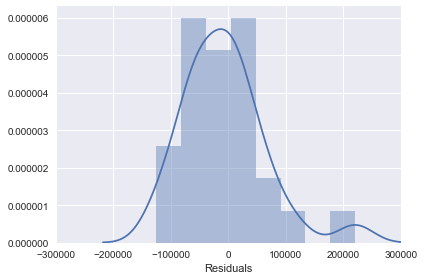

In [244]:
fig,ax=plt.subplots()
sns.distplot((y_test-predictions),bins=8)
ax.set_xlabel("Residuals")
ax.set_xlim(-300000,300000)
fig.tight_layout()

Residuals seems to be rather Normal.

## <font color=Blue>3.2. Using All Features</font>

In [258]:
# Separating labels and features
y1=df1["Average Home Price (City of Toronto)"]
X1=df1.drop(["Average Home Price (City of Toronto)"],axis=1)

In [259]:
# Allocating train test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

In [260]:
# Instantiating the model
lm=LinearRegression(normalize=True)

# Fitting train data into model
lm.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [261]:
predictions1=lm.predict(X1_test)

Text(0,0.5,'Predicted Y')

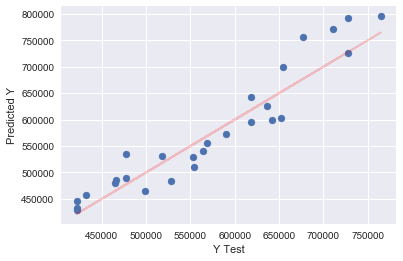

In [262]:
plt.scatter(y1_test,predictions1)
plt.plot(y1_test,y1_test, "-r", alpha=.2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [263]:
print("R square: {}".format(r2_score(y1_test, predictions1)))
print("RMSE square: {}".format(np.sqrt(metrics.mean_squared_error(y1_test, predictions1))))


R square: 0.876481585737167
RMSE square: 35910.11767003073


By using more all the features, obviously R squared will increase. It seems RMSE also decreases tremendously by half.

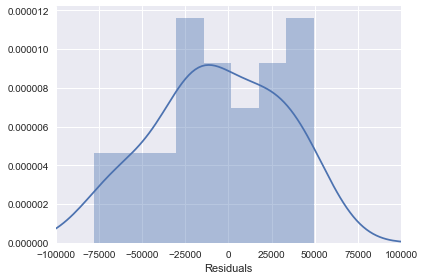

In [265]:
fig,ax=plt.subplots()
sns.distplot((y1_test-predictions1),bins=8)
ax.set_xlabel("Residuals")
ax.set_xlim(-100000,100000)
fig.tight_layout()

Residuals seem rather Normal here as well.